In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
train_Y=train['label']
train.drop('label',axis=1,inplace=True) 
print(train.shape)
print(train_Y.shape) 

(42000, 784)
(42000,)


In [5]:
print(train.isnull().any().describe())
print('\n')
print(train_Y.isnull().any())
print('\n')
print(test.isnull().any().describe()) 

count       784
unique        1
top       False
freq        784
dtype: object


False


count       784
unique        1
top       False
freq        784
dtype: object


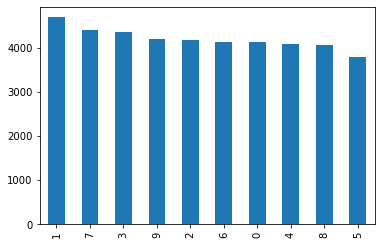

In [6]:
train_Y.value_counts().plot.bar()
plt.show() 

In [7]:
train=train/255
test=test/255

In [8]:
train_Y=train_Y.to_numpy()
train=train.to_numpy() 
test=test.to_numpy()

In [9]:
# Label encoding:

Y_train=np.zeros((train_Y.size,10))
Y_train[np.arange(train_Y.size),train_Y] = 1 

In [10]:
print(Y_train[7]) 

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [11]:
train=train.reshape(-1,28,28,1)
test=test.reshape(-1,28,28,1)  

In [12]:
# Data splitting:

train_X=train[4200:]
train_Y=Y_train[4200:] 
valid_X=train[:4200]
valid_Y=Y_train[:4200]  

In [13]:
print("Train_X shape: ",train_X.shape)
print("Train_Y shape: ",train_Y.shape)
print("valid_X shape: ",valid_X.shape)
print("valid_Y shape: ",valid_Y.shape)
print("Test shape: ",test.shape)

Train_X shape:  (37800, 28, 28, 1)
Train_Y shape:  (37800, 10)
valid_X shape:  (4200, 28, 28, 1)
valid_Y shape:  (4200, 10)
Test shape:  (28000, 28, 28, 1)


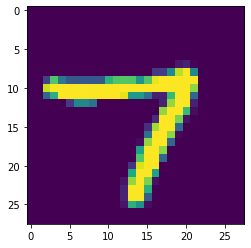

Digit is:  7


In [14]:
sample_image=train_X[0]
plt.imshow(sample_image)
plt.show()
print("Digit is: ",np.argmax(train_Y[0]))  

In [15]:
def digit_recognizer(input_shape):
    X_input=keras.layers.Input(input_shape)
    X=keras.layers.Conv2D(32,kernel_size=(5,5),padding="Same",activation="relu",name="conv_1")(X_input)
    X=keras.layers.Conv2D(32,kernel_size=(5,5),padding="Same",activation="relu",name="conv_2")(X)
    X=keras.layers.MaxPooling2D(pool_size=(2,2),name="max_pool_1")(X)
    X=keras.layers.Dropout(0.20)(X)
    X=keras.layers.Conv2D(64,kernel_size=(3,3),padding="Same",activation="relu",name="conv_3")(X)
    X=keras.layers.Conv2D(64,kernel_size=(3,3),padding="Same",activation="relu",name="conv_4")(X)
    X=keras.layers.MaxPooling2D(pool_size=(2,2),name="max_pool_2")(X)
    X=keras.layers.Dropout(0.20)(X)
    X=keras.layers.Flatten()(X)
    X=keras.layers.Dense(256,activation='relu',name="fc_1")(X)
    X=keras.layers.Dropout(0.20)(X)
    X=keras.layers.Dense(128,activation='relu',name="fc_2")(X)
    X=keras.layers.Dense(10,activation="softmax",name="output")(X) 
    
    model = keras.models.Model(inputs = X_input, outputs = X, name='Digit_recognizer')
    
    return model

In [16]:
digit_recognizer=digit_recognizer(train_X.shape[1:]) 
print(digit_recognizer.summary())

Model: "Digit_recognizer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
conv_4 (Conv2D)              (None, 14, 14, 64)   

In [17]:
digit_recognizer.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy']) 

In [18]:
digit_recognizer.fit(train_X,train_Y,validation_data=(valid_X,valid_Y),epochs=20)

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 107s 3ms/sample - loss: 0.1819 - accuracy: 0.9412 - val_loss: 0.0654 - val_accuracy: 0.9786
Epoch 2/20
37800/37800 [==============================] - 108s 3ms/sample - loss: 0.0660 - accuracy: 0.9805 - val_loss: 0.0428 - val_accuracy: 0.9869
Epoch 3/20
37800/37800 [==============================] - 107s 3ms/sample - loss: 0.0486 - accuracy: 0.9853 - val_loss: 0.0395 - val_accuracy: 0.9876
Epoch 4/20
37800/37800 [==============================] - 105s 3ms/sample - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0358 - val_accuracy: 0.9898
Epoch 5/20
37800/37800 [==============================] - 108s 3ms/sample - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0464 - val_accuracy: 0.9867
Epoch 6/20
37800/37800 [==============================] - 107s 3ms/sample - loss: 0.0320 - accuracy: 0.9906 - val_loss: 0.0340 - val_accuracy: 0.9905
Epoch 7/20
37800/37800 [===========================

In [19]:
test_Y=digit_recognizer.predict(test) 

In [20]:
print(type(test_Y))

<class 'numpy.ndarray'>


In [21]:
test_Y=np.argmax(test_Y,axis=1) 

In [22]:
submission=pd.read_csv("sample_submission.csv")
submission['Label']=test_Y

In [24]:
submission.to_csv("test_Y.csv",index=False)

In [25]:
# Accuracy on test set: 0.99100
# Rank:  800